# Data Segmentation

To perform image segmentation where the background of an image transformed to black pixels, we use a technique called thresholding, using OpenCV.

References:


*   Image Segmentation Algorithms Overview ( https://arxiv.org/ftp/arxiv/papers/1707/1707.02051.pdf )
*   Flower Categorization using Deep Convolutional Neural Networks ( https://arxiv.org/abs/1708.03763 )




### Import libraries

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
from shutil import copyfile
import zipfile

### Function for creating threshold segmentation "segment_image" and function for the transforming and storing new data on drive "create_segmentation"

In [ ]:
def segment_image(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    mask = cv2.bitwise_not(mask)
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    return segmented_image

def create_segmentation(input_folder, output_folder):

  if not os.path.exists(output_folder):
      os.makedirs(output_folder)

  for filename in os.listdir(input_folder):
      image_path = os.path.join(input_folder, filename)
      image = cv2.imread(image_path)
      segment_im = segment_image(image)
      output_path = os.path.join(output_folder, filename)
      cv2.imwrite(output_path, segment_im)


## Example of segmentation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
copyfile('gdrive/My Drive/DL_project/flower_photos.zip', 'flower_photos.zip')
zip = zipfile.ZipFile('flower_photos.zip')
zip.extractall()
zip.close()


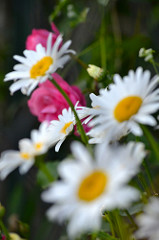

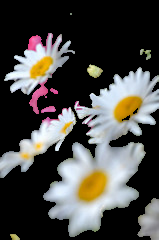

In [ ]:
image = cv2.imread('/content/flower_photos 2/daisy/14163875973_467224aaf5_m.jpg')
segmented_image = segment_image(image)

cv2_imshow(image)
cv2_imshow(segmented_image)

## Transformation of images from the dataset to new segmented images

Transformation is done separately by each folder to save proper data labels. New data stored in new drive folder "flower_black"

In [ ]:
create_segmentation('/content/flower_photos 2/dandelion', '/content/gdrive/MyDrive/DL_project/flower_black/dandelion')

In [ ]:
create_segmentation('/content/flower_photos 2/daisy', '/content/gdrive/MyDrive/DL_project/flower_black/daisy')

In [ ]:
create_segmentation('/content/flower_photos 2/roses', '/content/gdrive/MyDrive/DL_project/flower_black/roses')

In [ ]:
create_segmentation('/content/flower_photos 2/tulips', '/content/gdrive/MyDrive/DL_project/flower_black/tulips')

In [ ]:
create_segmentation('/content/flower_photos 2/sunflowers', '/content/gdrive/MyDrive/DL_project/flower_black/sunflowers')

In [ ]:
# create zip on drive

def create_zip_from_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, "w") as zip_file:
        for foldername, subfolders, filenames in os.walk(folder_path):
            for filename in filenames:
                file_path = os.path.join(foldername, filename)
                zip_file.write(file_path, os.path.relpath(file_path, folder_path))

folder_path = "gdrive/My Drive/DL_project/flower_black"
zip_path = "gdrive/My Drive/DL_project/flower_black.zip"
create_zip_from_folder(folder_path, zip_path)
